In [32]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [33]:
x_num,y_num=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

In [34]:
x=torch.from_numpy(x_num.astype(np.float32))
y=torch.from_numpy(y_num.astype(np.float32))
print(x.shape)
print(y.shape)

torch.Size([100, 1])
torch.Size([100])


In [35]:
y=y.view(y.shape[0],1)
y.shape

torch.Size([100, 1])

In [36]:
n_samples,n_features=x.shape

In [37]:
input=n_features
output=1

In [38]:
# model=nn.Linear(input,output)
# Loss=nn.MSELoss()
# opt=torch.optim.SGD(model.parameters(),lr=0.01)


In [39]:
class LinearRegression(nn.Module):
  def __init__(self,input_dim,out_dim):
    super(LinearRegression,self).__init__()
    self.lin=nn.Linear(input_dim,out_dim)

  def forward(self,x):
    return self.lin(x)


In [40]:
model=LinearRegression(input,output)
Loss=nn.MSELoss()
opt=torch.optim.SGD(model.parameters(),lr=0.01)

In [41]:
epochs=100
for epoch in range(epochs):
  y_pred=model(x)
  loss=Loss(y_pred,y)
  loss.backward()
  opt.step()
  opt.zero_grad()
  if epoch%10==0:
    print(f'Epoch:{epoch} , loss:{loss.item()}')


Epoch:0 , loss:5679.33447265625
Epoch:10 , loss:4204.255859375
Epoch:20 , loss:3138.95751953125
Epoch:30 , loss:2368.67724609375
Epoch:40 , loss:1811.093017578125
Epoch:50 , loss:1407.055419921875
Epoch:60 , loss:1114.0009765625
Epoch:70 , loss:901.256103515625
Epoch:80 , loss:746.6864624023438
Epoch:90 , loss:634.2994995117188


In [42]:
predicted=model(x).detach().numpy()


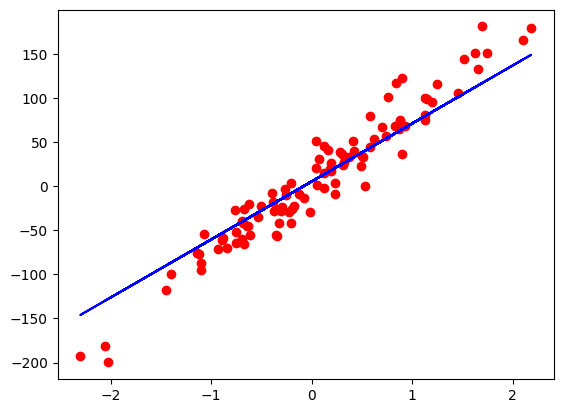

In [43]:
plt.plot(x_num,y_num,'ro')
plt.plot(x_num,predicted,'b')
plt.show()